# MADRID WEATHER FORECASTING PROJECT(1997-2025)
Madrid Weather Forecasting Project (1997–2025) by Idrisa Mustafa Selemani.

## 1. Introduction
- **Objective:**  
  Use historical weather data from Madrid (1997–2025) to analyze trends and predict future weather conditions (temperature, humidity, pressure, etc.).  

- **Why this project matters:**  
  Weather prediction supports agriculture, city planning, and daily decision making.  

- **Goal:**  
  Build a reproducible end to end data science project.

# IMPORTING NECESSARY LIBRARIES AND LOADING DATA.

In [41]:
import pandas as pd
import numpy as np
import plotly.express as px

In [42]:
df = pd.read_csv('Madrid Daily Weather 1997-2015.csv')
print(df)

             CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0     1997-01-01               7.0                4.0               2.0   
1     1997-01-02               7.0                3.0               0.0   
2     1997-01-03               5.0                3.0               2.0   
3     1997-01-04               7.0                3.0              -1.0   
4     1997-01-05               2.0                0.0              -1.0   
...          ...               ...                ...               ...   
6807  2015-12-27              14.0                7.0              -1.0   
6808  2015-12-28              15.0                8.0               2.0   
6809  2015-12-29              11.0                8.0               5.0   
6810  2015-12-30               9.0                8.0               6.0   
6811  2015-12-31              12.0               10.0               7.0   

      Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0            5.0  


# EXPLORATORY DATA ANALYSIS (EDA)

In [44]:
df.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

In [46]:
df = df.dropna()

In [47]:
df = df.drop(columns=[' Events'])

In [48]:
import matplotlib.pyplot as plt

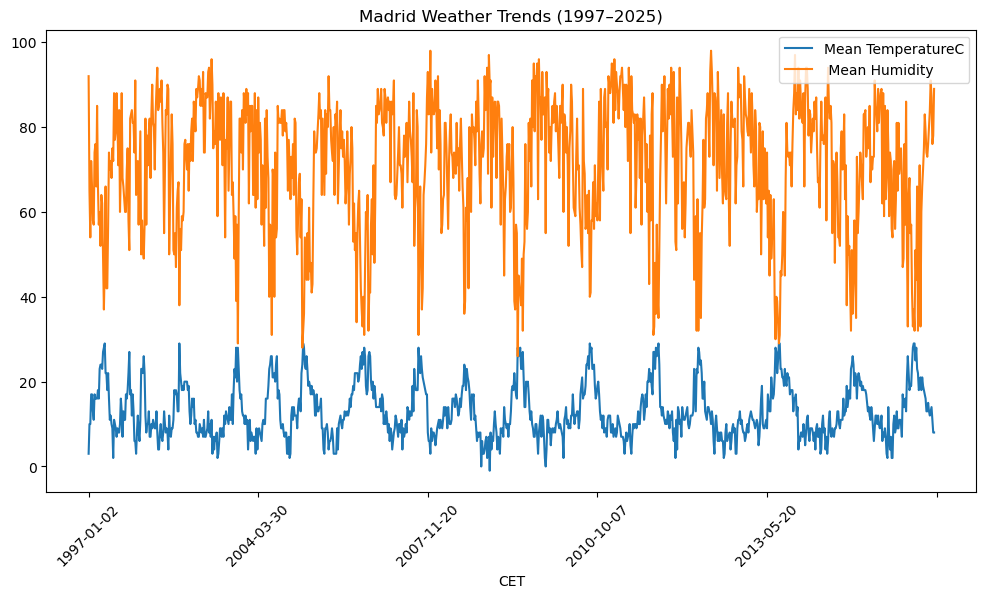

In [49]:
df.plot(x='CET', y=['Mean TemperatureC', ' Mean Humidity'], figsize=(12,6))
plt.title("Madrid Weather Trends (1997–2025)")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='CET'>

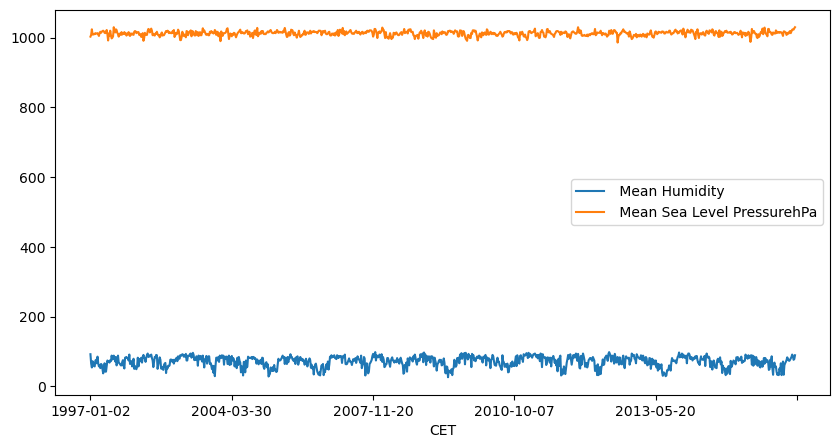

In [50]:
df.set_index('CET')[[' Mean Humidity',' Mean Sea Level PressurehPa']].plot(figsize=(10,5))

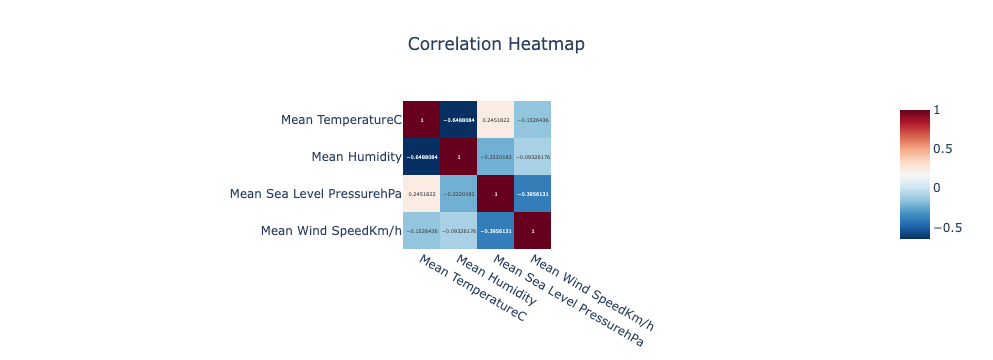

In [68]:
corr = df[['Mean TemperatureC','Mean Humidity','Mean Sea Level PressurehPa','Mean Wind SpeedKm/h']].corr()

fig = px.imshow(corr,
                 text_auto=True,
                 color_continuous_scale='RdBu_r',
                 title="Correlation Heatmap")
fig.update_layout(title_x=0.5)
fig.show()

# DATA SPLITING AND MODEL BUILDING.

In [69]:
 #Converting date column
df['CET'] = pd.to_datetime(df['CET'])
df = df.sort_values('CET')
df.columns = df.columns.str.strip()


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [71]:
# Droping 'CET' and 'Mean TemperatureC' from the feature set to build model
X = df.drop(columns=['Mean TemperatureC', 'CET'])

#Target variable
y = df['Mean TemperatureC']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [72]:
y_pred = model.predict(X_test)


# MODEL EVALUATION

In [73]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}°C")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error: 0.37°C
R² Score: 0.993


The model works really well. It predicts temperatures with an average error of only 0.37°C, which means the predictions are very close to the actual values. With an R² score of 0.993, the model explains almost all the variation in temperature from the weather features. This shows that the model can reliably estimate the mean temperature based on the data we have.

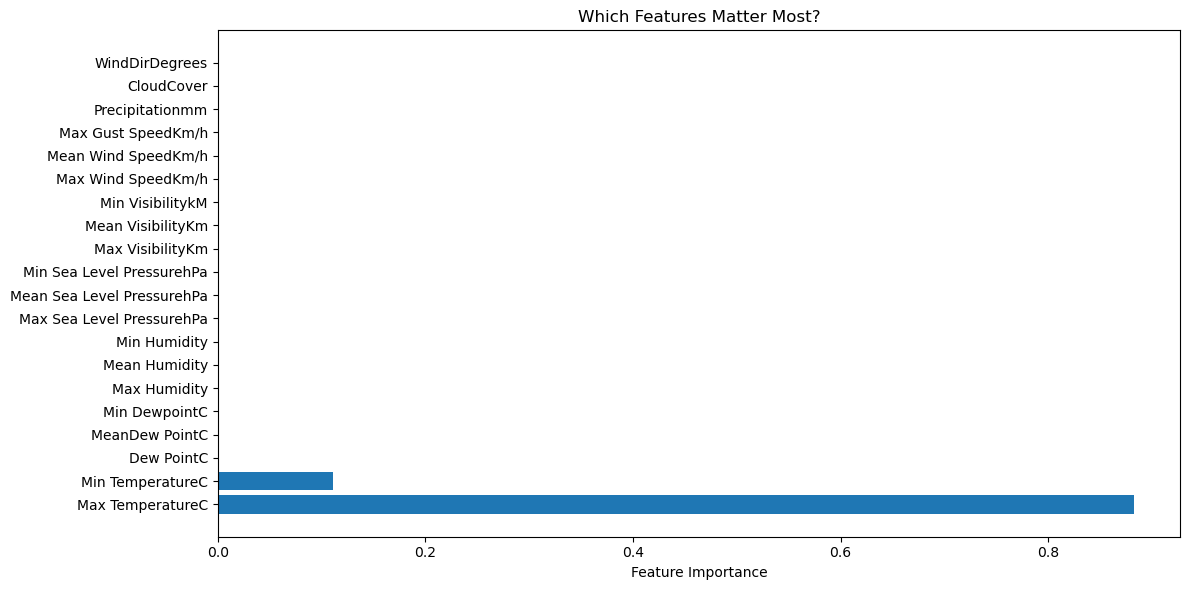

In [74]:
# Which features impact temperature predictions the most.
rf_model = model.named_steps['randomforestregressor']

# importance scores
importances = rf_model.feature_importances_
feature_names = X.columns

# Visual
plt.figure(figsize=(12,6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Which Features Matter Most?")
plt.tight_layout()
plt.show()

# CONCLUSION

The Random Forest model I built predicts the mean temperature very accurately, with an average error of only 0.37°C and an R² score of 0.993. This means the model explains almost all the variation in temperature based on the weather features. Overall, the model is reliable and effective for estimating daily mean temperatures.
To further improve this project, we could:

1. Collect more data to help the model generalize better.

2. Experiment with other machine learning algorithms like Gradient Boosting or Neural Networks.

3. Tune the model’s hyperparameters for even better accuracy.

4. Incorporate time series analysis to capture temperature trends over time.

5. Deploy the model using a web app or dashboard to make predictions accessible in real time.